In [ ]:
#%matplotlib inline
import time
import cv2

import numpy as np
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from IPython import display

In [ ]:

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [ ]:
!pip install -U scikit-image==0.17.2

In [ ]:
!wget https://gitlab.cit.fei.tuke.sk/computervision/cv_exercises_python/-/raw/master/imgs/traffic.avi

--2020-12-01 17:56:24--  https://gitlab.cit.fei.tuke.sk/computervision/cv_exercises_python/-/raw/master/imgs/traffic.avi
Resolving gitlab.cit.fei.tuke.sk (gitlab.cit.fei.tuke.sk)... 147.232.24.16
Connecting to gitlab.cit.fei.tuke.sk (gitlab.cit.fei.tuke.sk)|147.232.24.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208896 (204K) [video/avi]
Saving to: ‘traffic.avi.1’

traffic.avi.1       100%[===================>] 204.00K   565KB/s    in 0.4s    

2020-12-01 17:56:25 (565 KB/s) - ‘traffic.avi.1’ saved [208896/208896]



In [ ]:
video_path = './traffic.avi'
#video_path = "/content/tagged_cars.avi"
video_capture = cv2.VideoCapture(video_path)

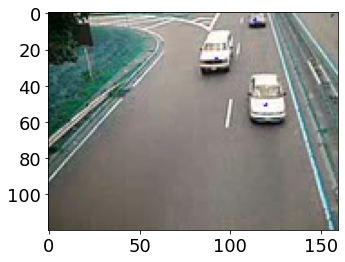

KeyboardInterrupt: ignored

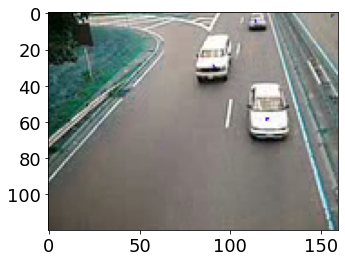

In [ ]:
while video_capture.isOpened():
    _, frame = video_capture.read()
    if not frame is None:
        plt.imshow(frame)
        plt.draw()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
    else:
        plt.draw()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.01)
        break

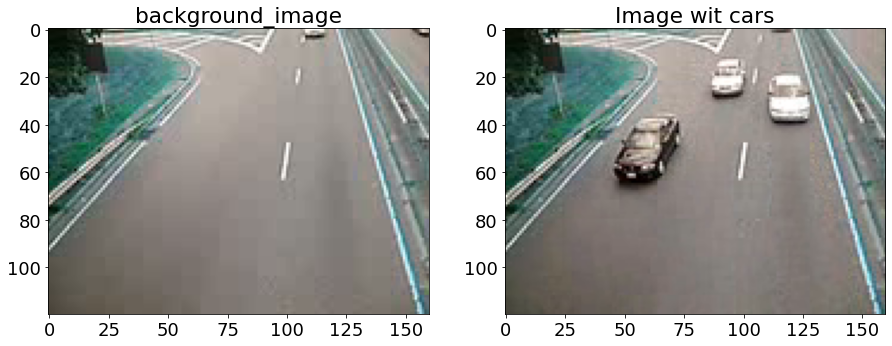

In [ ]:
width  = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

video_capture.set(cv2.CAP_PROP_POS_FRAMES,0)
_, background_image = video_capture.read()

video_capture.set(cv2.CAP_PROP_POS_FRAMES, 67)
_, image_with_cars = video_capture.read()

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(background_image)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(image_with_cars)

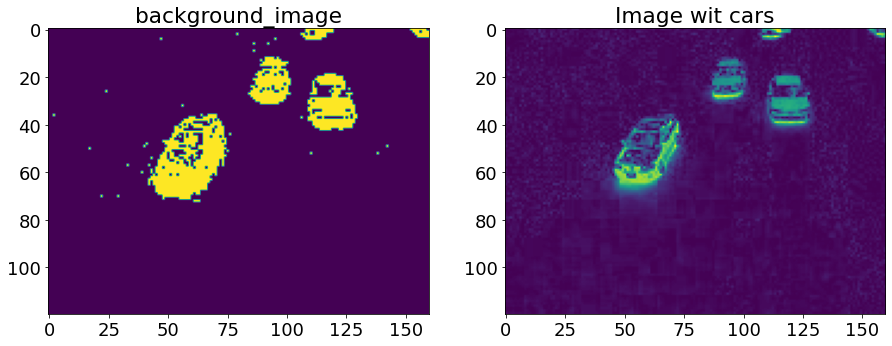

In [ ]:
from skimage.measure import label, regionprops, regionprops_table
from skimage import morphology

diff_image = np.abs(rgb2gray(background_image) - rgb2gray(image_with_cars))

diff_thresholded = diff_image*255 > 20

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)
plt.title("background_image")
plt.subplot(122)
plt.title("Image wit cars")
plt.imshow(diff_image)

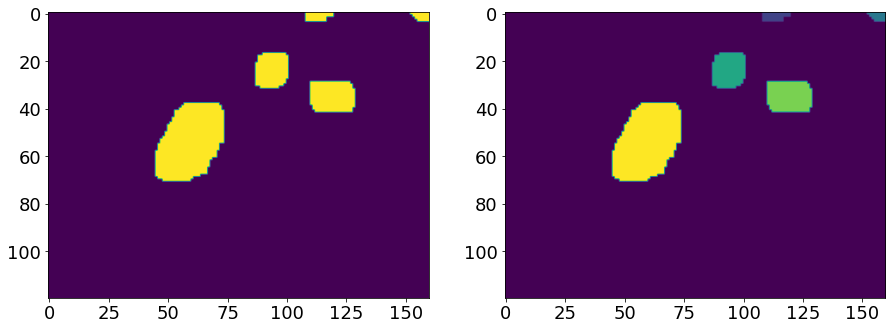

In [ ]:
diff_thresholded = morphology.opening(
    morphology.remove_small_holes(diff_thresholded,area_threshold=64),
    selem=morphology.selem.rectangle(8,8))
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(diff_thresholded)

label_img = label(diff_thresholded)
regions = regionprops(label_img)
plt.subplot(122)
plt.imshow(label_img)

<Figure size 1080x720 with 0 Axes>

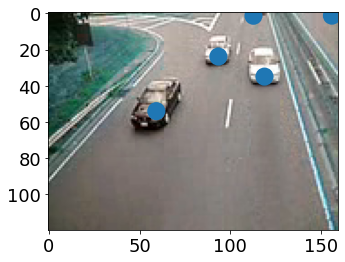

In [ ]:
import matplotlib.patches as patches
plt.figure(figsize=(15,10))
fig,ax = plt.subplots(1)
ax.imshow(image_with_cars)

for region in regions:
    centroid_viz =patches.Circle((region.centroid[1], region.centroid[0]))
    ax.add_patch(centroid_viz)

KeyboardInterrupt: ignored

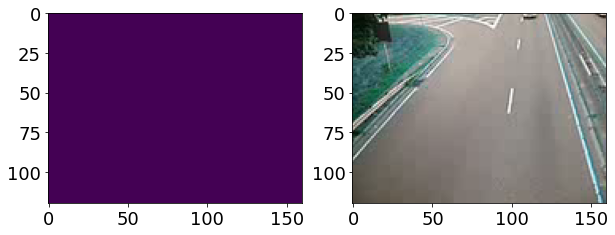

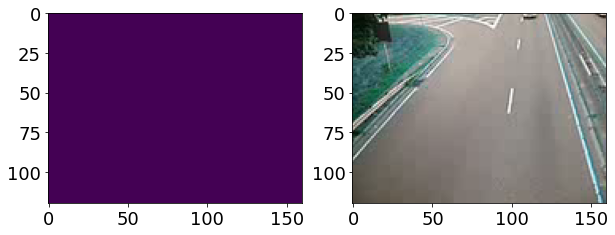

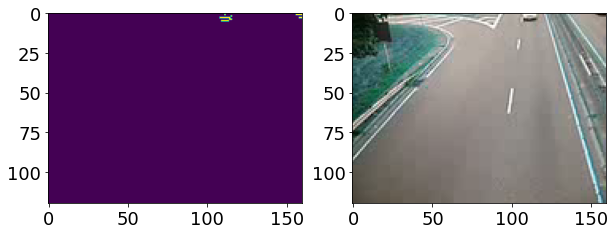

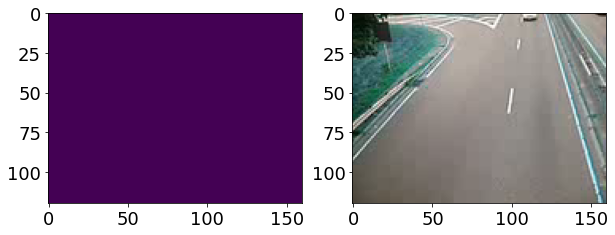

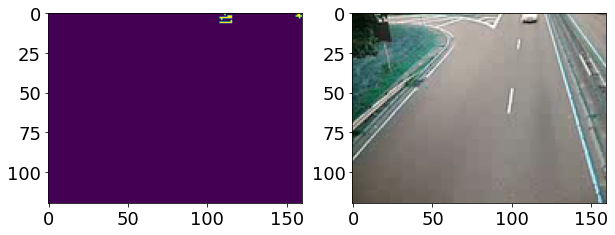

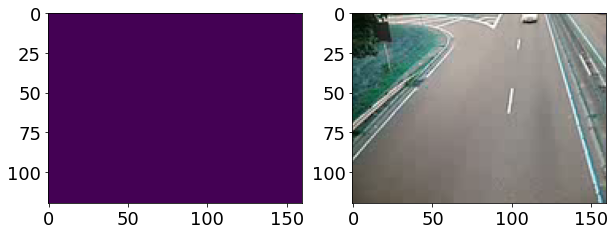

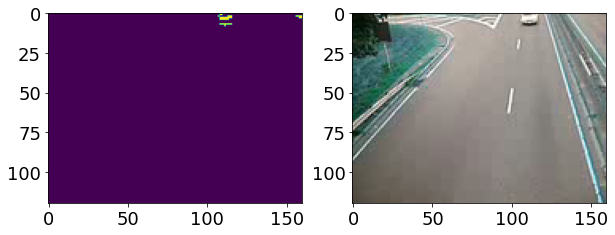

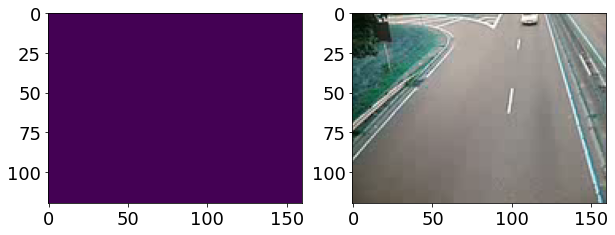

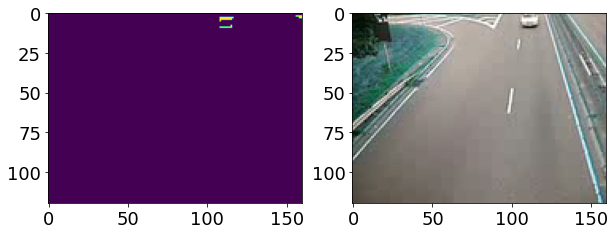

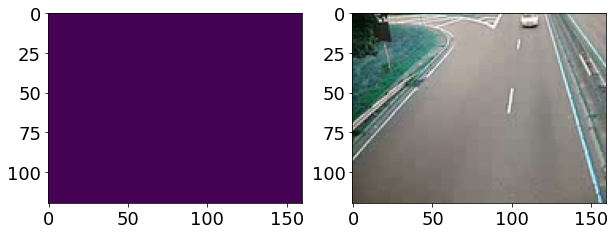

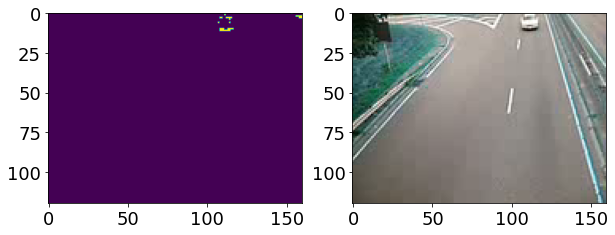

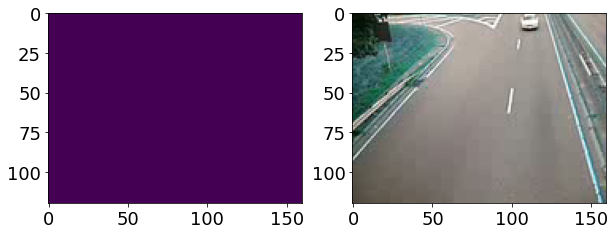

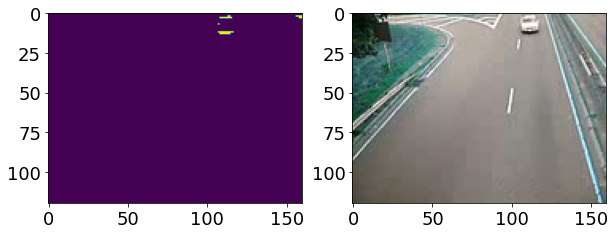

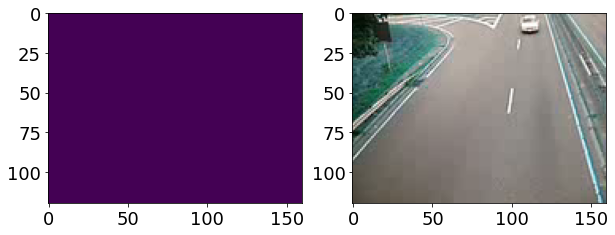

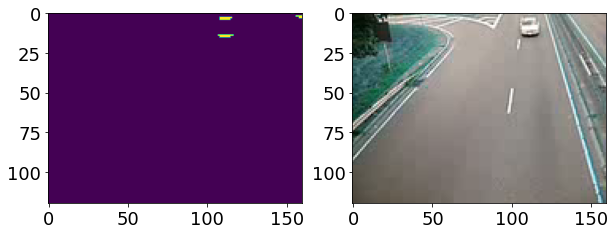

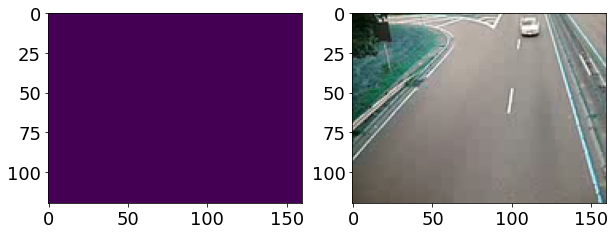

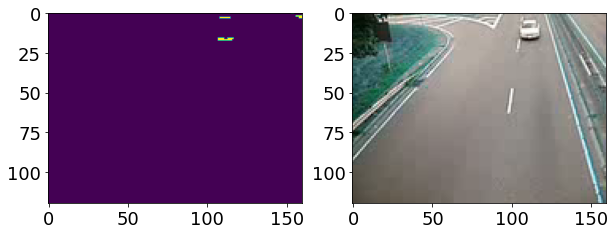

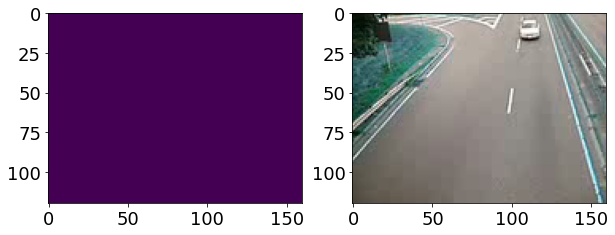

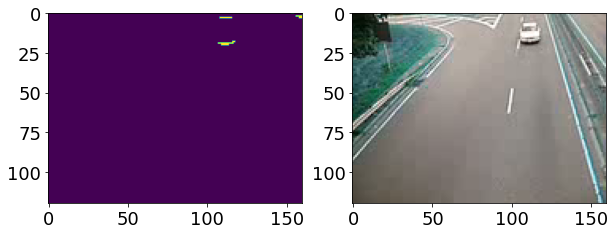

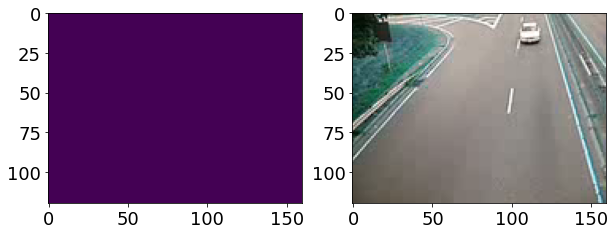

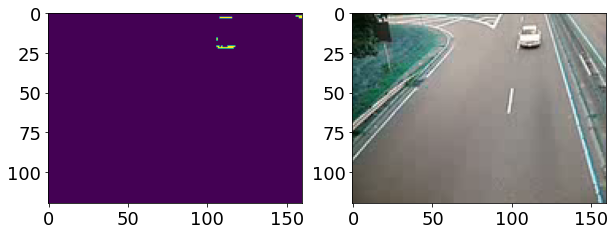

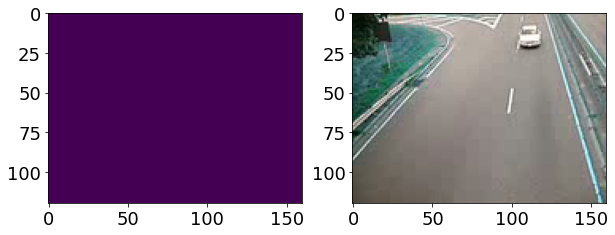

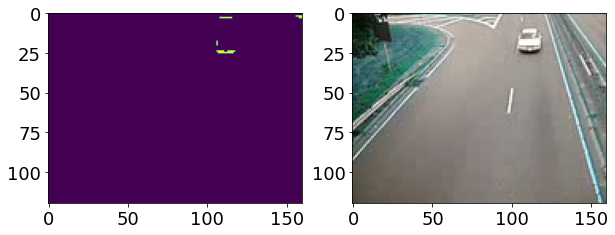

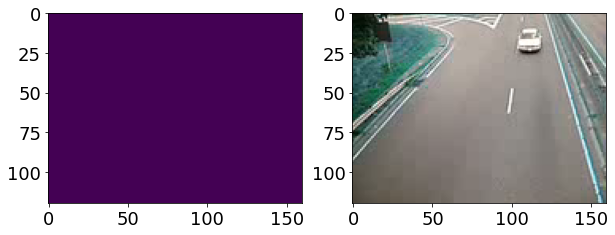

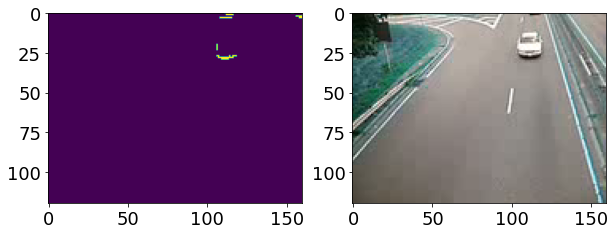

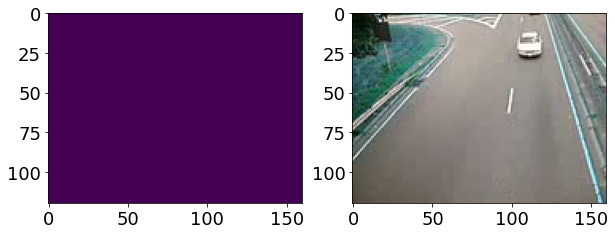

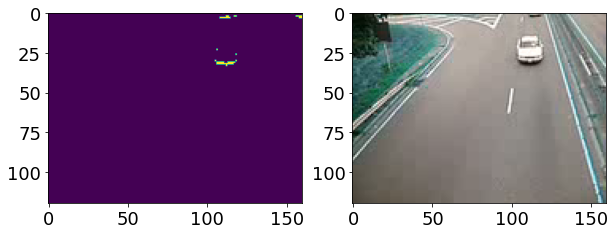

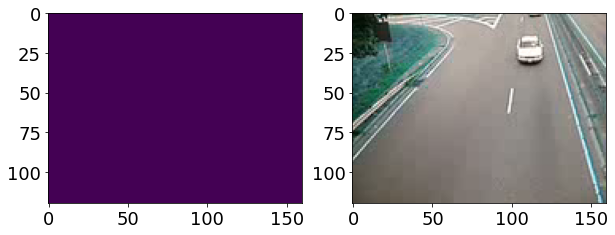

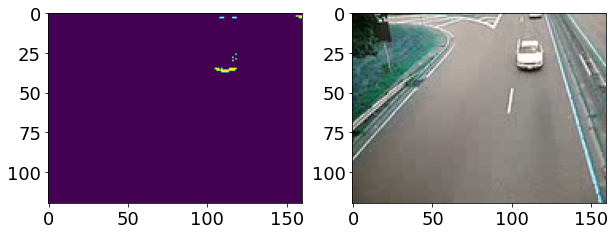

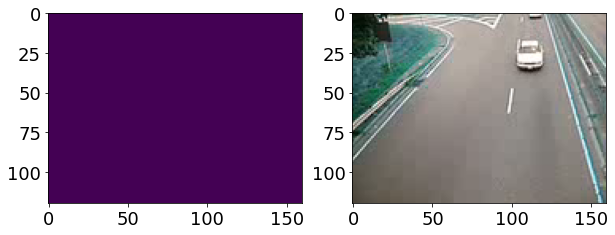

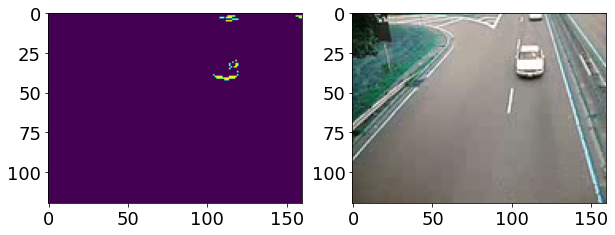

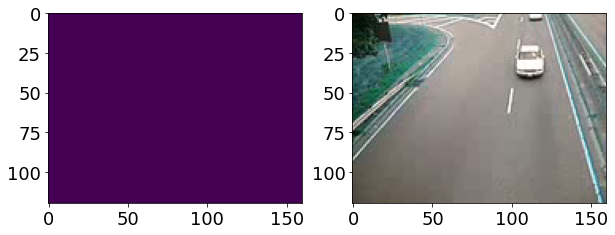

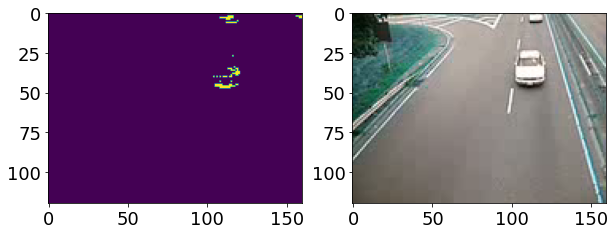

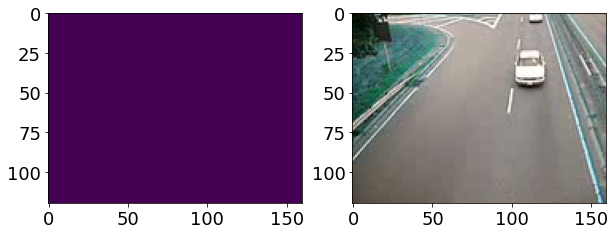

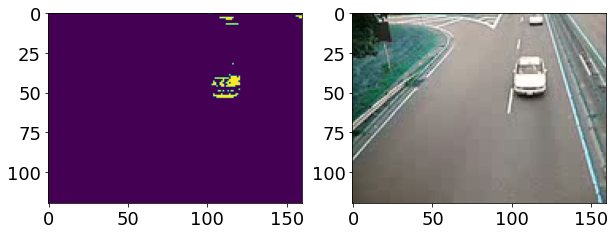

In [ ]:
from skimage.draw import disk
from skimage.morphology import opening,closing,area_opening,selem
video_capture = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('./tagged_cars.avi',fourcc, fps, (height,width))

for i in range(30):
    video_capture.set(cv2.CAP_PROP_POS_FRAMES,i)
    ret, frame = video_capture.read()
    if ret==True:
        #1 Detekcia objektov
        diff_image = np.abs(rgb2gray(background_image) - rgb2gray(frame))
        #2 Prahovanie objektov
        diff_thresholded = diff_image*255 > 100
        #3 Morfologicke operacie
        plotFrame(diff_thresholded,frame)

        





        diff_thresholded = morphology.opening(
        morphology.remove_small_holes(diff_thresholded,area_threshold=64),
        selem=morphology.selem.rectangle(8,8))

        
        label_img = label(diff_thresholded)
        regions = regionprops(label_img)
        #4 Uprava vystupu na zaklade
        for region in regions:
            rr, cc = disk((region.centroid[0], region.centroid[1]), 1)
            frame[rr, cc,:2] = 0
            frame[rr, cc, 2] = 255
            
        plotFrame(diff_thresholded,frame)
        
        #out.write(frame)
    else:
        break

video_capture.release()
out.release()


# DU 74-77

In [ ]:
def plotFrame(frame,originalFrame):
    plt.figure(figsize=(10,15))
    plt.subplot(121)
    plt.imshow(frame)
    plt.subplot(122)
    plt.imshow(originalFrame)
    plt.draw()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.01)

In [ ]:
video_capture = cv2.VideoCapture(video_path)
length = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)
video_capture.set(cv2.CAP_PROP_POS_FRAMES,0)
_, background_image = video_capture.read()

120
